# Analysis of fitness trackers (Indian market)

Dataset downloaded from the Kaggle site consists of fitness tracker products data like specifications and ratings on the Indian market. The data was collected from the e-commerce website Flipkart using webscraping technique.

### Content

Data consists of 610 samples with 11 attributes:
* **Brand Name:** This indicates the manufacturer of the product (fitness tracker)
* **Device Type:** This has two categories- FitnessBand and Smartwatch
* **Model Name:** This indicates the variant/Product Name
* **Color:** This includes the color of the Strap/Body of the fitness tracker
* **Selling Price:** This column has the Selling Price or the Discounted Price of the fitness tracker
* **Original Price:** This includes the Original Price of the product from the manufacturer.
* **Display:** This categorical variable shows the type of display for the fitness tracker. eg: AMOLED, LCD,OLED, etc.
* **Rating (Out of 5):** Average customer ratings on a scale of 5.
* **Strap Material:** Details of the material used for the strap of the fitness tracker.
* **Average Battery Life (in days):** Quoted average battery life from the manufacturer based on the individual product pages. (It is not the scraped data)
* **Reviews:** count of product reviews received.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
df = pd.read_csv('Fitness_trackers.csv', thousands=',')

## Initial inspection

In [3]:
df.shape

(610, 11)

In [4]:
df

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
605,Fire-Boltt,Smartwatch,Talk Bluetooth,"Black, Grey, Green",3499,9999,HD Display,4.1,Silicone,10,923.0
606,Fire-Boltt,Smartwatch,Almighty,Orange,4999,14999,AMOLED Display,4.1,Silicone,10,212.0
607,Fire-Boltt,Smartwatch,Mercury,Red,2999,7999,HD Display,4.0,Silicone,8,4941.0
608,Fire-Boltt,Smartwatch,Spin,White,5846,5999,TFT-LCD Display,2.4,Silicone,5,15.0


In [5]:
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [6]:
df.tail()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
605,Fire-Boltt,Smartwatch,Talk Bluetooth,"Black, Grey, Green",3499,9999,HD Display,4.1,Silicone,10,923.0
606,Fire-Boltt,Smartwatch,Almighty,Orange,4999,14999,AMOLED Display,4.1,Silicone,10,212.0
607,Fire-Boltt,Smartwatch,Mercury,Red,2999,7999,HD Display,4.0,Silicone,8,4941.0
608,Fire-Boltt,Smartwatch,Spin,White,5846,5999,TFT-LCD Display,2.4,Silicone,5,15.0
609,Fire-Boltt,Smartwatch,Ninja Pro,White,1999,4999,HD Display,4.0,Silicone,10,688.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      610 non-null    object 
 1   Device Type                     610 non-null    object 
 2   Model Name                      610 non-null    object 
 3   Color                           610 non-null    object 
 4   Selling Price                   610 non-null    int64  
 5   Original Price                  610 non-null    int64  
 6   Display                         610 non-null    object 
 7   Rating (Out of 5)               554 non-null    float64
 8   Strap Material                  610 non-null    object 
 9   Average Battery Life (in days)  610 non-null    int64  
 10  Reviews                         114 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 52.6+ KB


## Data cleaning and preparation

In [8]:
trackers = df.rename(columns={'Brand Name':'Brand', 
                              'Device Type':'Type', 
                              'Model Name':'Name', 
                              'Rating (Out of 5)':'Rating', 
                              'Strap Material':'Strap', 
                              'Average Battery Life (in days)':'Avg Battery Life'
                            })

In [9]:
trackers['Display'] = trackers['Display'].str.replace('Display', '', regex=False)

In [10]:
trackers['Brand'] = trackers['Brand'].astype('category')
trackers['Type'] = trackers['Type'].astype('category')
trackers['Selling Price'] = trackers['Selling Price'].astype(float)
trackers['Original Price'] = trackers['Original Price'].astype(float)
trackers['Reviews'] = trackers['Reviews'].astype(float)

In [11]:
any(trackers.isna())

True

In [12]:
trackers.isna().sum()

Brand                 0
Type                  0
Name                  0
Color                 0
Selling Price         0
Original Price        0
Display               0
Rating               56
Strap                 0
Avg Battery Life      0
Reviews             496
dtype: int64

In [13]:
(trackers.isnull().sum() / len(trackers)) * 100

Brand                0.000000
Type                 0.000000
Name                 0.000000
Color                0.000000
Selling Price        0.000000
Original Price       0.000000
Display              0.000000
Rating               9.180328
Strap                0.000000
Avg Battery Life     0.000000
Reviews             81.311475
dtype: float64

There are some missing values for rating of products and many in reviews.

In [14]:
del trackers['Reviews']

In [15]:
brand_rating_mean = trackers.groupby('Brand')['Rating'].mean().round(2).sort_values(ascending=False)

brand_rating_mean

C:\Users\weron\AppData\Local\Temp\ipykernel_2336\2886200100.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_rating_mean = trackers.groupby('Brand')['Rating'].mean().round(2).sort_values(ascending=False)


Brand
APPLE              4.55
OnePlus            4.30
dizo by realme     4.25
FOSSIL             4.24
SAMSUNG            4.23
Honor              4.20
FitBit             4.19
Xiaomi             4.17
Huawei             4.16
huami              4.15
realme             4.14
GARMIN             4.09
Noise              4.06
Fastrack           4.02
Crossbeats         3.92
Oppo               3.90
boAt               3.90
Infinix            3.80
Fire-Boltt         3.75
Noise              3.75
Zebronics          3.72
LCARE              3.65
LAVA               3.60
GOQii              3.35
Ptron              3.20
Name: Rating, dtype: float64

In [16]:
trackers['Rating'] = trackers.apply(lambda row: brand_rating_mean[row['Brand']] if pd.isnull(row['Rating']) else row['Rating'], axis=1)

In [17]:
trackers['Strap'] = trackers['Strap'].replace('leather', 'Leather')

In [18]:
any(trackers.duplicated())

True

In [19]:
trackers.drop_duplicates()

,Brand,Type,Name,Color,Selling Price,Original Price,Display,Rating,Strap,Avg Battery Life
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499.0,2999.0,AMOLED,4.1,Thermoplastic polyurethane,14
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099.0,2499.0,AMOLED,4.2,Thermoplastic polyurethane,14
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722.0,2099.0,LCD,3.5,Leather,14
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469.0,2999.0,AMOLED,4.1,Thermoplastic polyurethane,14
4,Xiaomi,FitnessBand,Band 3,Black,1799.0,2199.0,OLED,4.3,Plastic,7
...,...,...,...,...,...,...,...,...,...,...
605,Fire-Boltt,Smartwatch,Talk Bluetooth,"Black, Grey, Green",3499.0,9999.0,HD,4.1,Silicone,10
606,Fire-Boltt,Smartwatch,Almighty,Orange,4999.0,14999.0,AMOLED,4.1,Silicone,10
607,Fire-Boltt,Smartwatch,Mercury,Red,2999.0,7999.0,HD,4.0,Silicone,8
608,Fire-Boltt,Smartwatch,Spin,White,5846.0,5999.0,TFT-LCD,2.4,Silicone,5


## Data exploration and analysis

### Initial peek at data

In [20]:
trackers.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling Price,610.0,20706.859016,19803.690357,799.0,6995.0,14999.0,27467.50,122090.0
Original Price,610.0,23977.503279,20242.634014,1599.0,10249.0,18995.0,31416.75,122090.0
Rating,610.0,4.183541,0.405474,2.0,4.0,4.2,4.50,5.0
Avg Battery Life,610.0,8.926230,7.632107,1.0,2.0,7.0,14.00,45.0


In [21]:
def plot_diagrams(data):
    '''
    Function plot diagrams for provided data.
    data: provided data
    '''
    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    sns.histplot(data, bins=10, kde=False, ax=axes[0])
    sns.boxplot(data, ax=axes[1], orient='h')

    plt.show()

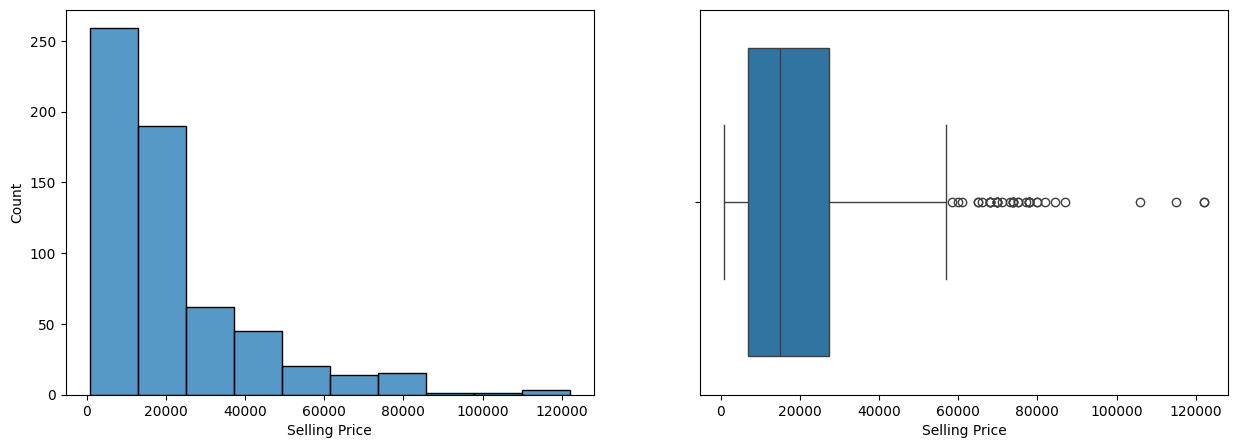

In [22]:
plot_diagrams(trackers['Selling Price'])

Most fitness trackers are priced in the range of around 799-15000 INR, some devices are more expensive than that and the most expensive device reaches the value of 122090 INR.

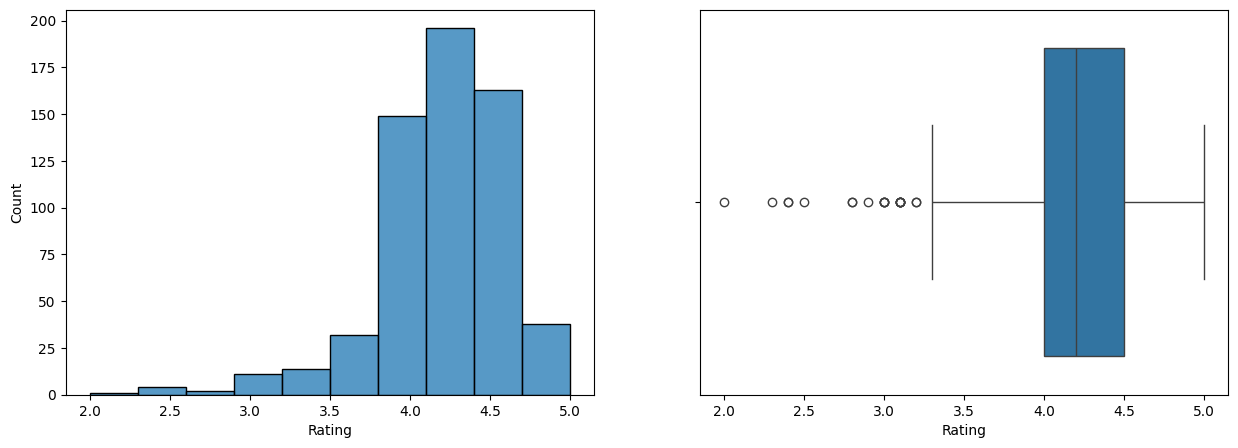

In [23]:
plot_diagrams(trackers['Rating'])

Plot idicates outliers - ratings below around 3.3 are not that common, where users mostly rate bought devices with 4.2 out of 5.

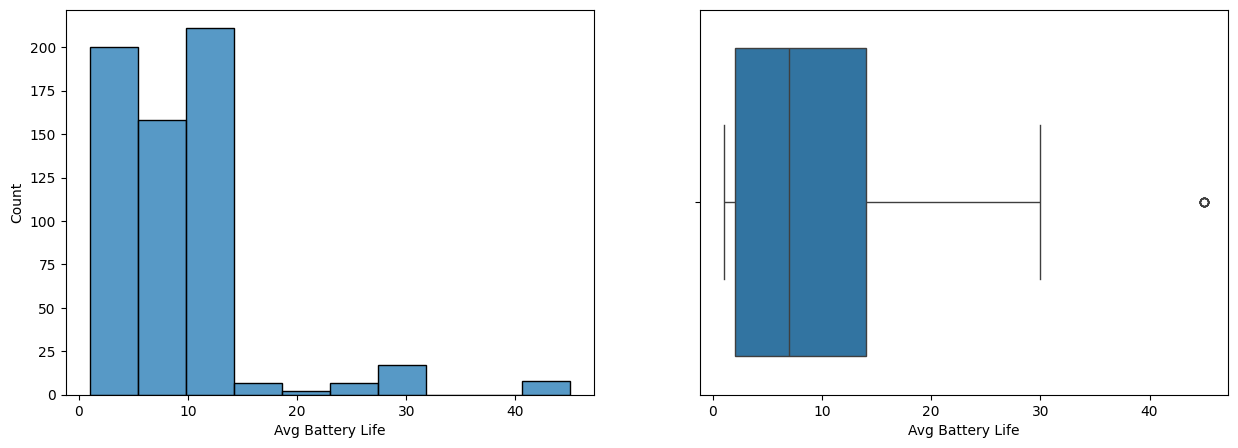

In [24]:
plot_diagrams(trackers['Avg Battery Life'])


The avarage battery is 7 hours and for devices 30 is max, more can idicate quite uncommon feature for a device.

We can spot outliers in the dataset for pricing, rating and avarage battery life. Still, these values are possible, as some brands and fitness tracker models can perform better, are more premium or are liked more by the consumers. We will dive into these aspect deeper during further analysis.

### How many brands are we analysing

In [25]:
trackers['Brand'].unique()

['Xiaomi', 'OnePlus ', 'FitBit', 'realme', 'Huawei', ..., 'Crossbeats', 'dizo by realme ', 'Ptron', 'Zebronics', 'Fire-Boltt']
Length: 25
Categories (25, object): ['APPLE', 'Crossbeats', 'FOSSIL ', 'Fastrack', ..., 'boAt ', 'dizo by realme ', 'huami', 'realme']

In the dataset there are 610 different fitness trackers of 25 unique brands on the market.

### Number of devices of each brand

In [27]:
brand_devices_num = trackers.groupby('Brand')['Name'].count().sort_values(ascending=False)
brand_devices_num

C:\Users\weron\AppData\Local\Temp\ipykernel_2336\1259381301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_devices_num = trackers.groupby('Brand')['Name'].count().sort_values(ascending=False)


Brand
FOSSIL             133
GARMIN             101
APPLE               86
FitBit              51
SAMSUNG             48
huami               36
Huawei              26
Noise               20
Honor               20
Fire-Boltt          14
Zebronics           12
realme              12
Xiaomi              10
Crossbeats           8
Fastrack             6
boAt                 5
Ptron                5
GOQii                4
OnePlus              3
LCARE                2
Noise                2
Oppo                 2
dizo by realme       2
Infinix              1
LAVA                 1
Name: Name, dtype: int64

[]

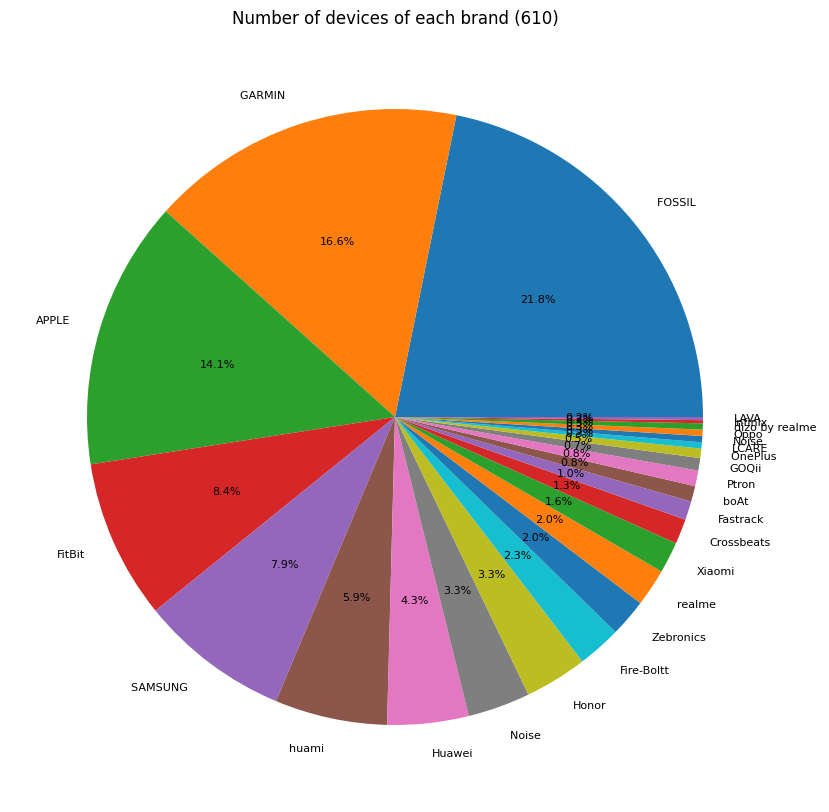

In [28]:
plt.figure(figsize=(10,10))
plt.pie(brand_devices_num, labels = brand_devices_num.index, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Number of devices of each brand (610)')
plt.plot()

<Axes: xlabel='Count', ylabel='Brand'>

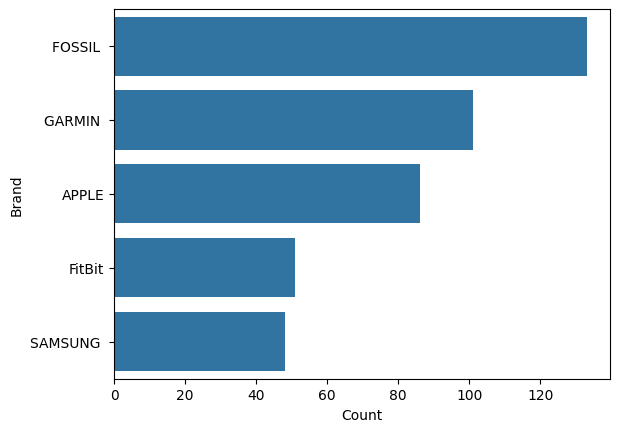

In [29]:
brand_devices = brand_devices_num.reset_index(name='Name')
brand_devices_top5 = brand_devices.head(5)
brand_devices_top5 = brand_devices_top5.rename(columns={'Name':'Count'})

sns.barplot(brand_devices_top5, x='Count', y='Brand', order=brand_devices_top5['Brand'], orient='h')

From 25 brands, when it comes to number of devices, top 5 are: Fossil, Garmin, Apple, FitBit and Samsung.

### Fitness tracker types and their popularity

In [30]:
trackers['Type'].unique()

['FitnessBand', 'Smartwatch']
Categories (2, object): ['FitnessBand', 'Smartwatch']

We can divide trackers into two most popular categories: fitness bands and smartwatches.

In [31]:
tracker_types = trackers.groupby('Type')['Brand'].count().reset_index()
tracker_types = tracker_types.rename(columns={'Brand': 'Count'})
tracker_types

C:\Users\weron\AppData\Local\Temp\ipykernel_2336\1988276041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tracker_types = trackers.groupby('Type')['Brand'].count().reset_index()


,Type,Count
0,FitnessBand,77
1,Smartwatch,533


<Axes: xlabel='Count', ylabel='Type'>

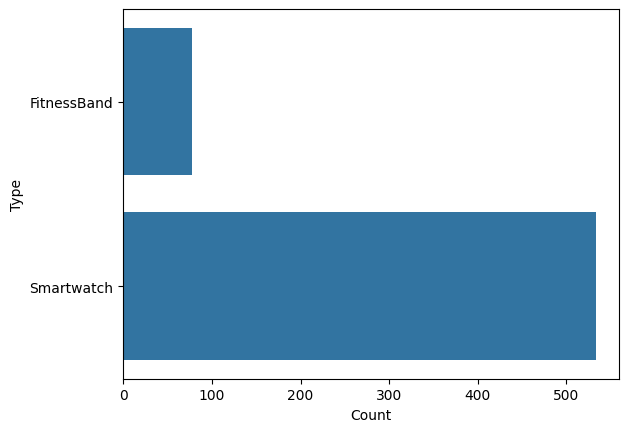

In [32]:
sns.barplot(tracker_types, x = 'Count', y = 'Type', orient='h')

<Axes: xlabel='Brand', ylabel='count'>

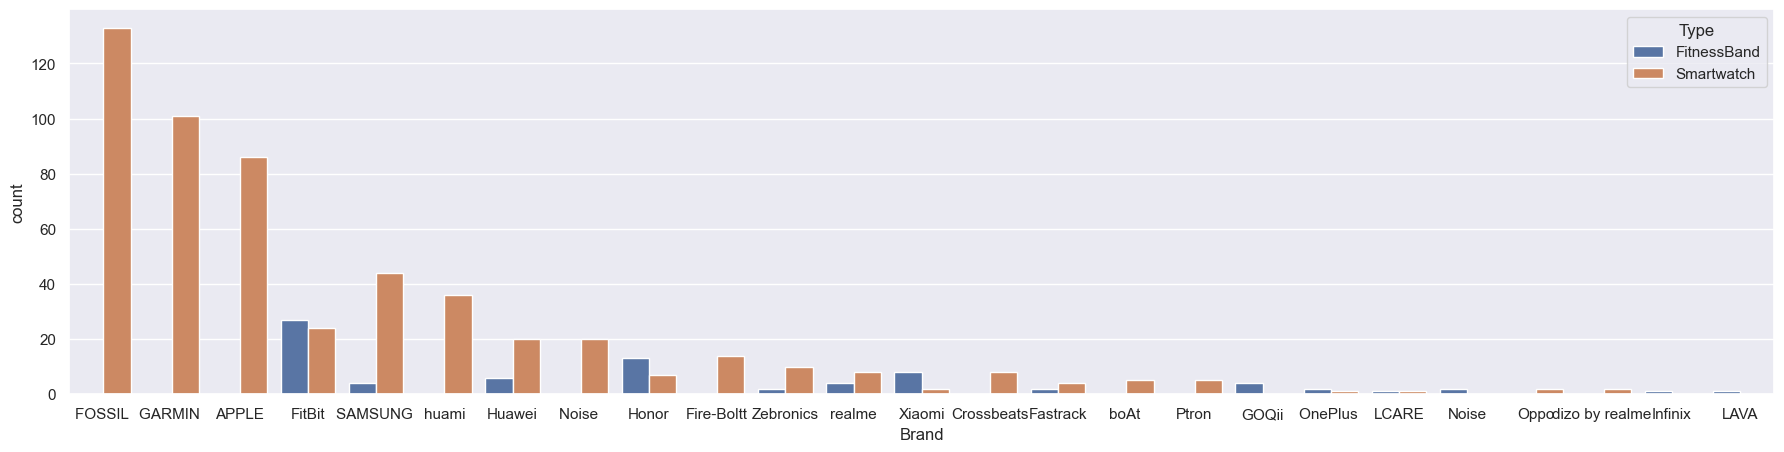

In [49]:
plt.figure(figsize=(22, 5))
sns.countplot(trackers, x='Brand', hue='Type', order=trackers['Brand'].value_counts().index)

We can see that smartwatches are definitely more popular than fitness bands.

Brands like FitBit, Honor, Xiaomi, GOQii and Noise are focusing more on fitness bands production or do this exclusively.

### Pricing

In [34]:
avg_prices = trackers.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).reset_index()
avg_prices

C:\Users\weron\AppData\Local\Temp\ipykernel_2336\1391104153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_prices = trackers.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).reset_index()


,Brand,Selling Price
0,APPLE,49413.837209
1,GARMIN,35038.227723
2,SAMSUNG,22901.375000
3,Oppo,16490.000000
4,Huawei,15874.615385
5,FitBit,14018.843137
6,FOSSIL,13824.954887
7,huami,7547.638889
8,OnePlus,6932.333333
9,Honor,5510.000000


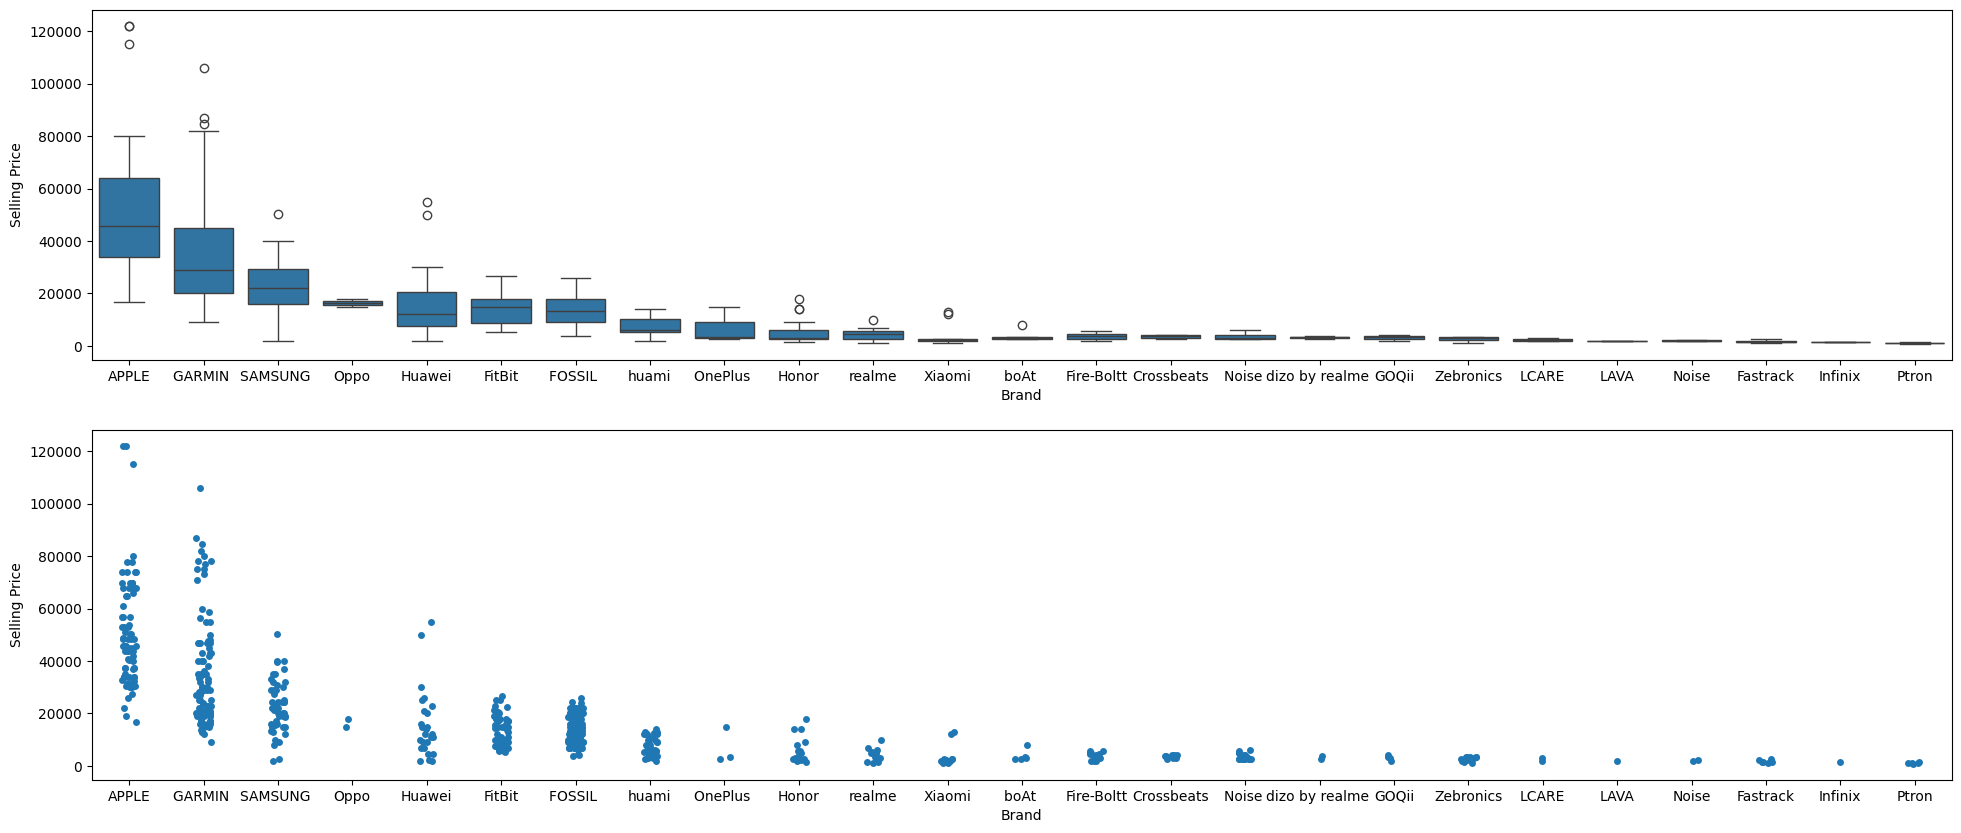

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(24,10))

sns.boxplot(data=trackers, x='Brand', y='Selling Price', order=avg_prices['Brand'], ax=axes[0])
sns.stripplot(data=trackers, x='Brand', y='Selling Price', order=avg_prices['Brand'], ax=axes[1])

plt.show()

The most expensive brand of fitness trackers is definitely Apple, then Garmin and Samsung, with Huawei also having some premium, high-end models.

### Can features like display type and band type significantly up product price

<Axes: xlabel='Selling Price', ylabel='Display'>

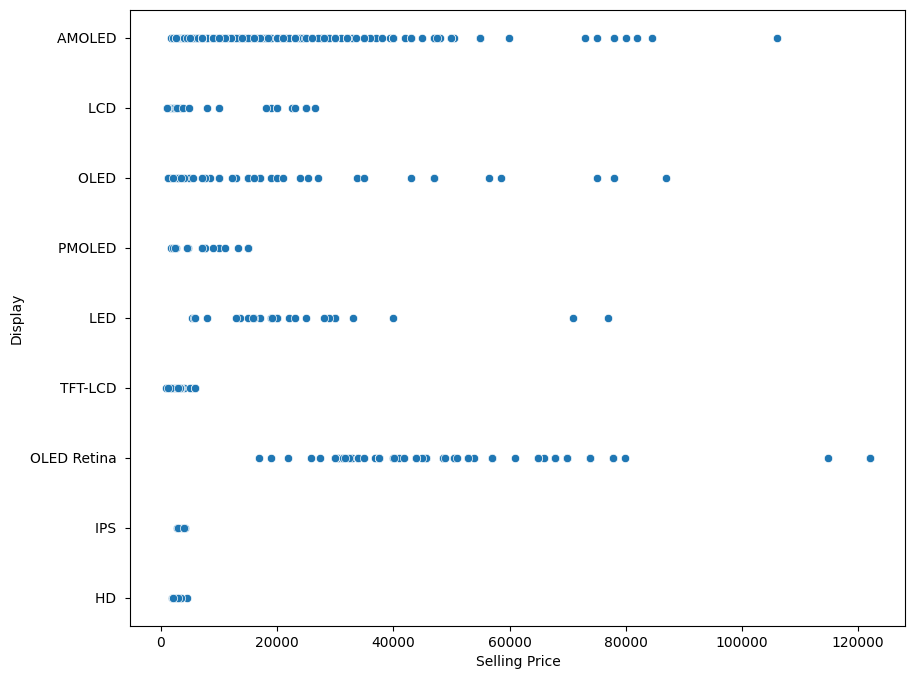

In [36]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=trackers, x='Selling Price', y='Display')

OLED, AMOLED and OLED Retina displays found in Apple products are the most expensive display types for fitness tracker devices and up the price.

<Axes: xlabel='Selling Price', ylabel='Strap'>

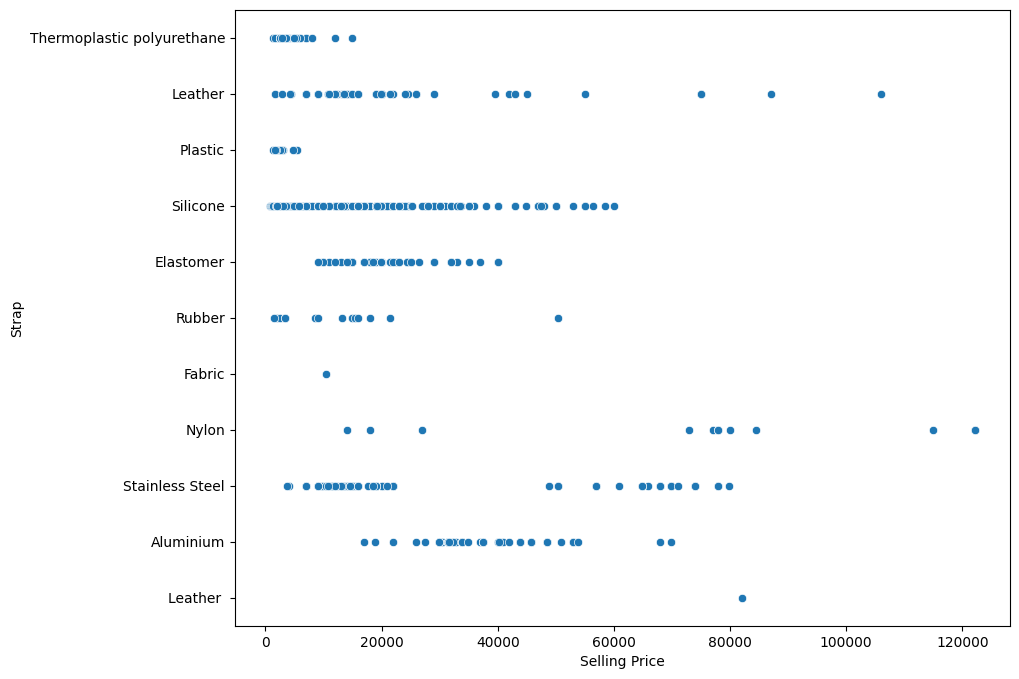

In [37]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=trackers, x='Selling Price', y='Strap')

In [38]:
strap_type = trackers['Strap'].value_counts().sort_values(ascending=False)
strap_type

Strap
Silicone                      270
Stainless Steel                97
Leather                        62
Aluminium                      57
Elastomer                      45
Thermoplastic polyurethane     35
Plastic                        16
Rubber                         14
Nylon                          12
Fabric                          1
Leather                         1
Name: count, dtype: int64

<Axes: xlabel='Strap', ylabel='count'>

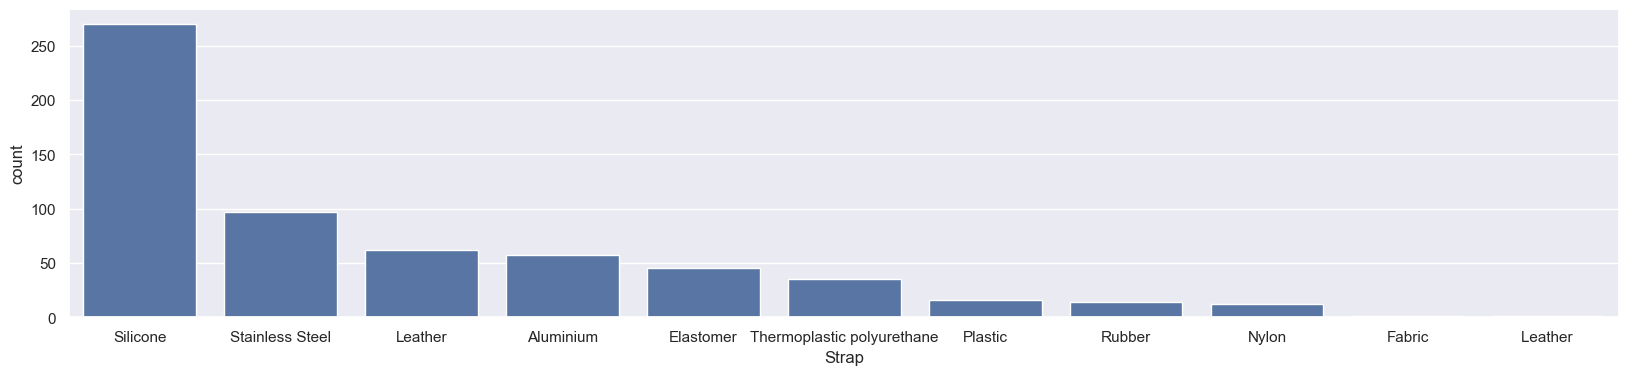

In [53]:
plt.figure(figsize=(20, 4))
sns.barplot(strap_type)

Devices with silicone straps are the most popular, whereas leather and nylon straps are the most expensive.

<Axes: xlabel='Brand', ylabel='count'>

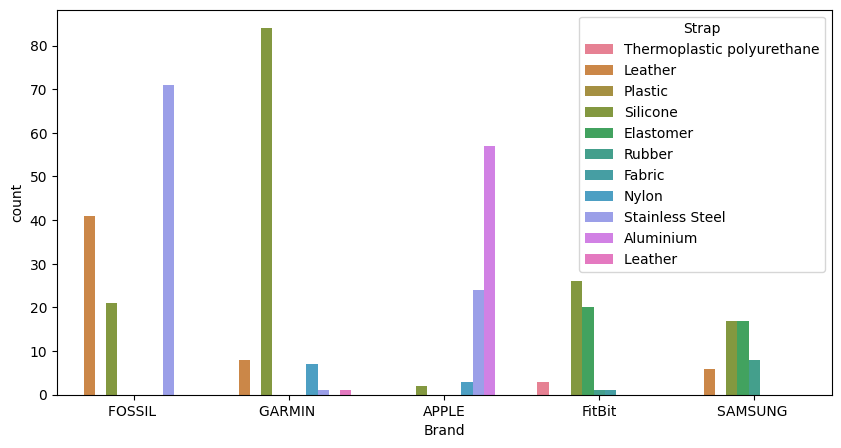

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(trackers, x='Brand', hue='Strap', order=trackers['Brand'].value_counts().iloc[:5].index)

Brands with the most extensive product catalogue have their favourite strap materials to fit to the clientelle needs:
* Fossil - Stainless Steel
* Garmin - Silicone
* Apple - Aluminium

### Avarage ratings

In [41]:
avg_ratings = trackers.groupby('Brand')['Rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings

C:\Users\weron\AppData\Local\Temp\ipykernel_2336\2349912092.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ratings = trackers.groupby('Brand')['Rating'].mean().sort_values(ascending=False).reset_index()


,Brand,Rating
0,APPLE,4.545349
1,OnePlus,4.300000
2,dizo by realme,4.250000
3,FOSSIL,4.244361
4,SAMSUNG,4.229167
5,Honor,4.195000
6,FitBit,4.186275
7,Xiaomi,4.170000
8,Huawei,4.161538
9,huami,4.152778


<Axes: xlabel='Brand', ylabel='Rating'>

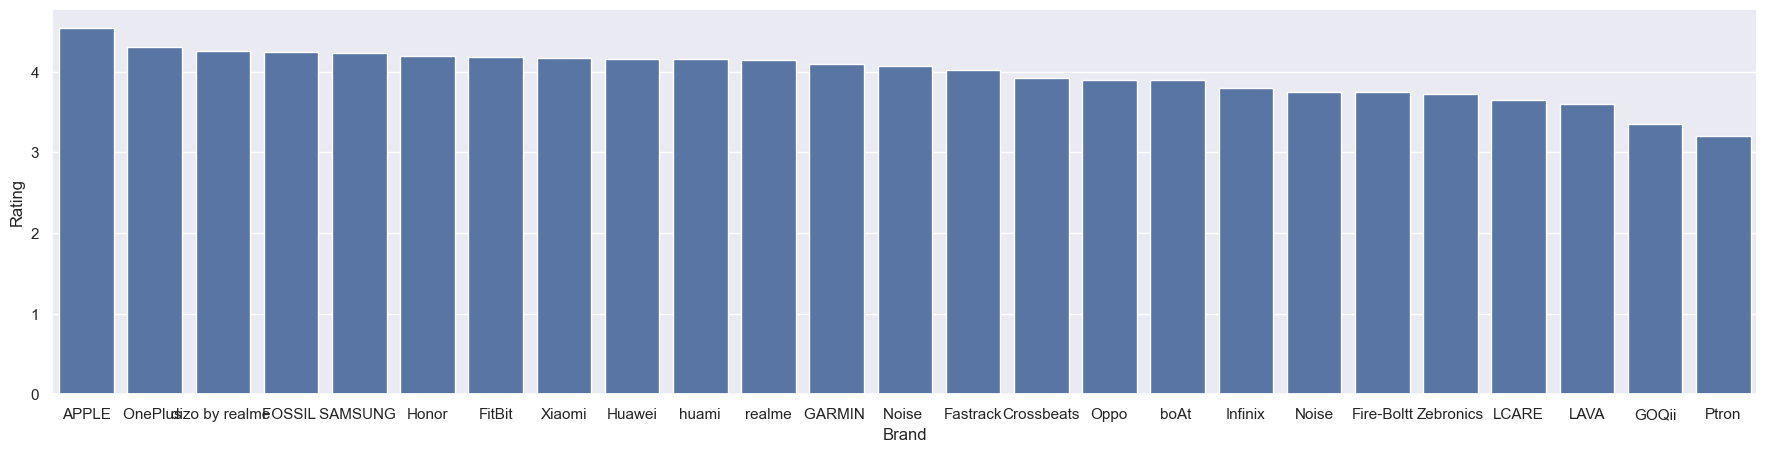

In [42]:
sns.set_theme(rc={"figure.figsize":(22, 5)})
sns.barplot(avg_ratings, x = 'Brand', y = 'Rating', order=avg_ratings['Brand'])

In [43]:
avg_ratings.head(5)

,Brand,Rating
0,APPLE,4.545349
1,OnePlus,4.300000
2,dizo by realme,4.250000
3,FOSSIL,4.244361
4,SAMSUNG,4.229167


Many brands have similiar avarage ratings but we can see that Apple is rated the highest, most likely due to the loyal fanbase who loves Apple devices and quality and innovation of the products.

### Battery life

In [44]:
avg_battery_day = trackers.groupby('Brand')['Avg Battery Life'].mean().sort_values(ascending=False).reset_index()
avg_battery_day

C:\Users\weron\AppData\Local\Temp\ipykernel_2336\1160533561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_battery_day = trackers.groupby('Brand')['Avg Battery Life'].mean().sort_values(ascending=False).reset_index()


,Brand,Avg Battery Life
0,GARMIN,16.960396
1,huami,16.055556
2,Oppo,14.000000
3,Xiaomi,12.500000
4,dizo by realme,12.000000
5,SAMSUNG,11.812500
6,Honor,11.750000
7,Huawei,11.307692
8,Crossbeats,10.500000
9,realme,10.500000


<Axes: xlabel='Brand', ylabel='Avg Battery Life'>

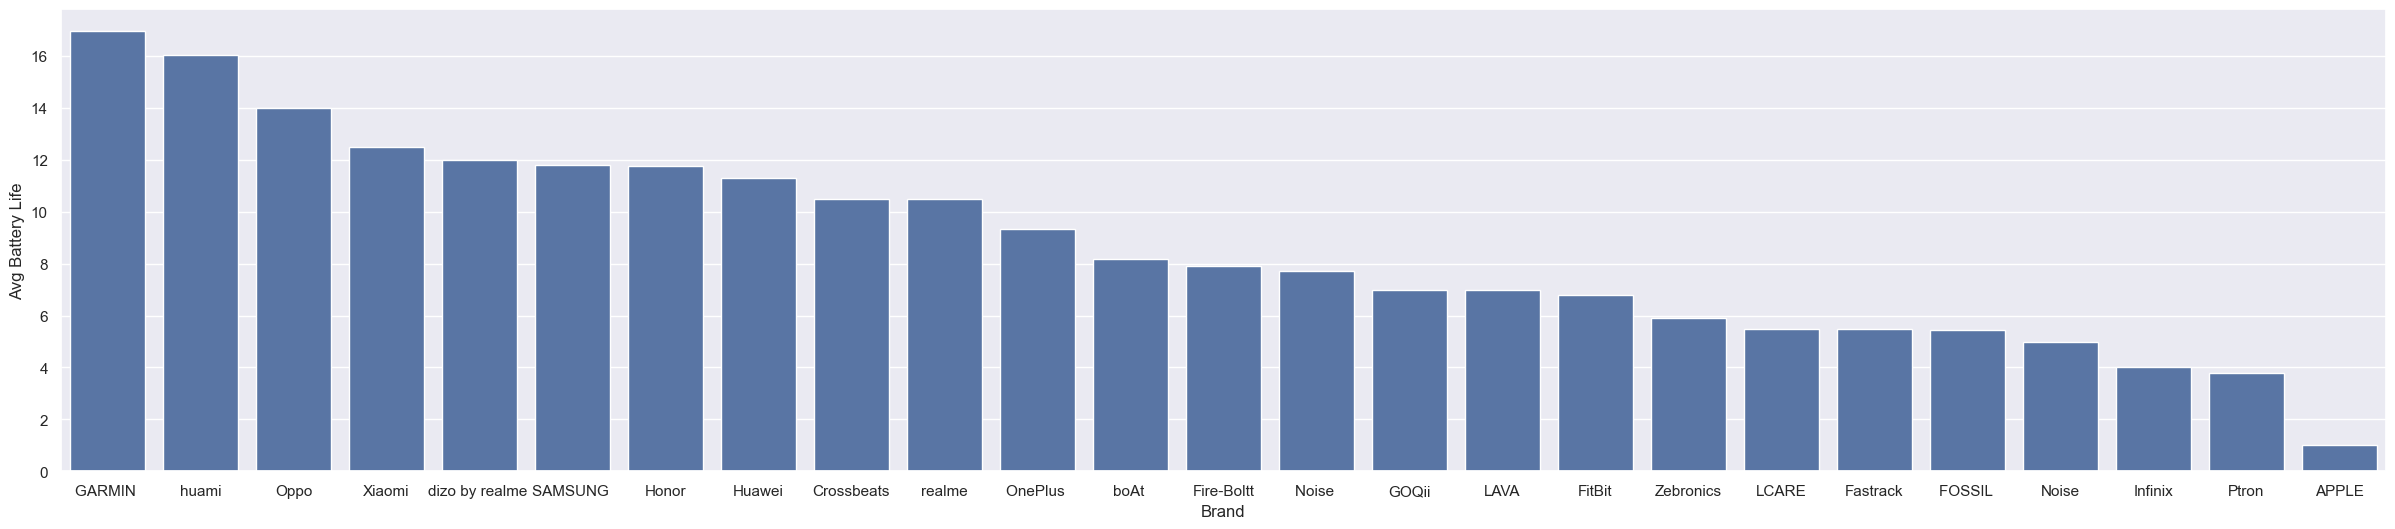

In [45]:
sns.set_theme(rc={"figure.figsize":(30, 6)})
sns.barplot(avg_battery_day, x = 'Brand', y = 'Avg Battery Life', order=avg_battery_day['Brand'])

#### Does more expensive products have longer battery life

Garmin's smartwatches have on avarage the longest battery life - the brand's focus is on many different sport disciplines and reliability, even in unfavorable conditions.
On the other hand, Apple devices have the shortest battery life, leading to the conclusion that not all expensive smartwatches have better battery. Yet it's up to the debate, because Apple smartwatches are packed with many energy-consuming features.